In [1]:
pip install lightgbm pandas scikit-learn numpy


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.4 MB/s eta 0:00:00


In [107]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import early_stopping, log_evaluation


In [109]:
# Charger les données
data1 = pd.read_csv("C:\\Users\\Dell\\house-price-prediction\\notebooks\\dimensionality reduction\\feature_selection_train.csv")
data2 = pd.read_csv("C:\\Users\\Dell\\house-price-prediction\\notebooks\\dimensionality reduction\\feature_selection_test.csv")

In [111]:
print(X.columns.tolist())

['surface', 'nb_pieces', 'annee_construction', 'quartier_A', 'quartier_B', 'quartier_C', 'quartier_D']


In [113]:
np.random.seed(42)
data_size = 1000
X = pd.DataFrame({
    'surface': np.random.randint(50, 200, size=data_size),
    'nb_pieces': np.random.randint(1, 6, size=data_size),
    'quartier': np.random.choice(['A', 'B', 'C', 'D'], size=data_size),
    'annee_construction': np.random.randint(1950, 2020, size=data_size)
})
y = 100000 + X['surface'] * 2000 + X['nb_pieces'] * 50000 + np.random.normal(0, 30000, size=data_size)

In [115]:
X = pd.get_dummies(X, columns=['quartier'])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [121]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1
}

In [123]:
model = lgb.train(params,
                 train_data,
                 num_boost_round=1000,
                 valid_sets=[test_data],
                 callbacks=[
                     lgb.early_stopping(stopping_rounds=50),
                     lgb.log_evaluation(10)
                 ])

Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 87946.2
[20]	valid_0's rmse: 60530.5
[30]	valid_0's rmse: 44600.5
[40]	valid_0's rmse: 37912.4
[50]	valid_0's rmse: 35015
[60]	valid_0's rmse: 33428.5
[70]	valid_0's rmse: 32774.9
[80]	valid_0's rmse: 32354.4
[90]	valid_0's rmse: 32412.4
[100]	valid_0's rmse: 32542.8
[110]	valid_0's rmse: 32625.1
[120]	valid_0's rmse: 32796.9
[130]	valid_0's rmse: 32964.7
Early stopping, best iteration is:
[85]	valid_0's rmse: 32321.4


In [125]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [127]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 32321.36


In [133]:
import lightgbm as lgb
print(lgb.__version__)

4.6.0


In [135]:
y_pred = model.predict(X_test)

print("\n=== Métriques d'Évaluation ===")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")


=== Métriques d'Évaluation ===
RMSE: 32321.36
MAE: 25437.58
R²: 0.9289


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

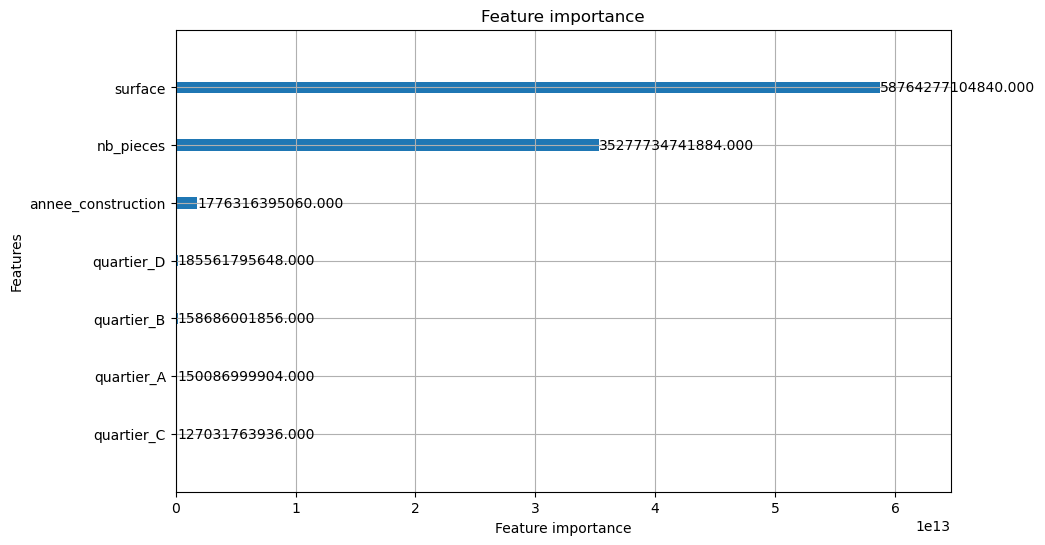

In [137]:
lgb.plot_importance(model, importance_type='gain', figsize=(10, 6), max_num_features=20)

In [139]:
model.save_model('modele_lightgbm.txt')

print("\nModèle sauvegardé sous 'modele_lightgbm.txt'")


Modèle sauvegardé sous 'modele_lightgbm.txt'


In [141]:
y_train_pred = model.predict(X_train)

In [143]:
print("\n=== Métriques sur l'ensemble d'entraînement ===")
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"MAE (train): {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")


=== Métriques sur l'ensemble d'entraînement ===
RMSE (train): 24372.88
MAE (train): 19550.34
R² (train): 0.9519


In [145]:
print("\n=== Comparaison Train/Test ===")
print(f"RMSE - Train: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} | Test: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE - Train: {mean_absolute_error(y_train, y_train_pred):.2f} | Test: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² - Train: {r2_score(y_train, y_train_pred):.4f} | Test: {r2_score(y_test, y_pred):.4f}")


=== Comparaison Train/Test ===
RMSE - Train: 24372.88 | Test: 32321.36
MAE - Train: 19550.34 | Test: 25437.58
R² - Train: 0.9519 | Test: 0.9289


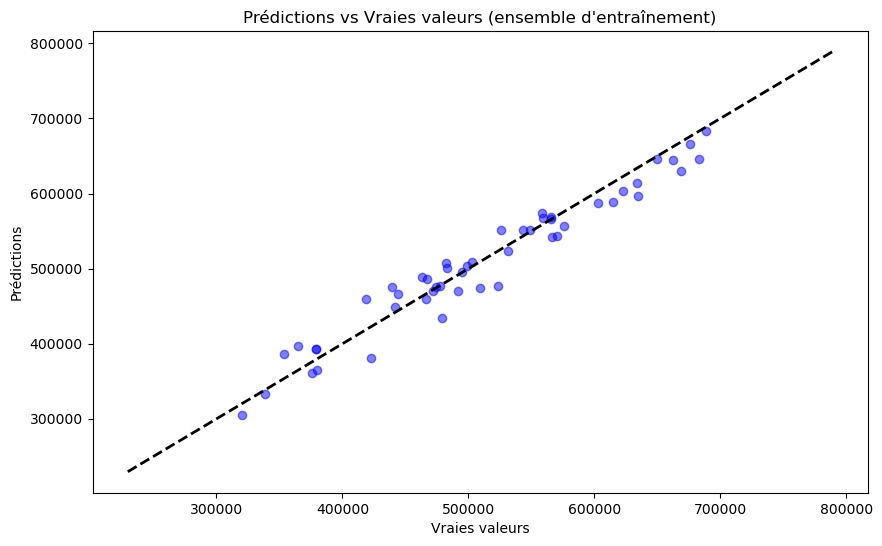

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train[:50], y_train_pred[:50], color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Vraies valeurs (ensemble d\'entraînement)')
plt.show()